<a href="https://colab.research.google.com/github/Phanttan/Deep-learning-with-Python-Francois-Chollet/blob/main/3_4_classifying_movie_reviews_moreUnits_sameLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0][0]

1

In [ ]:
len(train_data[0])

218

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index['crazier']

14902

In [ ]:
reverse_word_index.get(2,'?')

'and'

In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
x_train[0].shape

(10000,)

In [ ]:
x_train[0][0]

0.0

In [ ]:
type(train_labels)

numpy.ndarray

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
len(partial_x_train)

15000

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.4844 - binary_accuracy: 0.7821 - val_loss: 0.3720 - val_binary_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2681 - binary_accuracy: 0.9103 - val_loss: 0.2913 - val_binary_accuracy: 0.8860
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2004 - binary_accuracy: 0.9296 - val_loss: 0.2747 - val_binary_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1524 - binary_accuracy: 0.9489 - val_loss: 0.2845 - val_binary_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1207 - binary_accuracy: 0.9599 - val_loss: 0.3094 - val_binary_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1032 - binary_accuracy: 0.9655 - val_loss: 0.3336 - val_binary_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

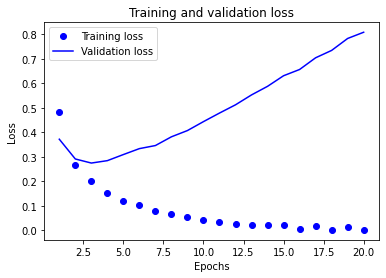

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

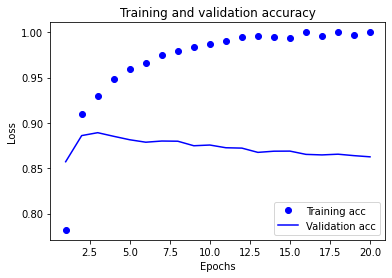

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc') # bo : blue dot
plt.plot(epochs, val_acc, 'b', label='Validation acc') # b: solid blue dot
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 1s 30ms/step - loss: 0.4285 - accuracy: 0.8189
Epoch 2/3
49/49 [==============================] - 1s 30ms/step - loss: 0.2462 - accuracy: 0.9105
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.8696


In [ ]:
results

[0.3257591128349304, 0.8696399927139282]

In [ ]:
model.predict(x_test)

array([[0.29938203],
       [0.99952817],
       [0.9888277 ],
       ...,
       [0.17326656],
       [0.12948418],
       [0.8339664 ]], dtype=float32)

## Conclusions


Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.


## New conclusion when adding more 1 layer

1. Many cases can be possible with **val_loss** and **val_binary_accuracy**:
  * **val_binary_accurcy** starts increasing and **val_loss** starts decreasing

    == > Model is cramming values, not learning.

  * **val_binary_accurcy** starts increasing and **val_loss** starts increasing

    == > Model is overfitting or diverse probability values when softmax is using in output layer.

  * **val_binary_accurcy** starts decreasing and **val_loss** starts increasing

    == > Model is learning and working fine.

  * **val_binary_accurcy** starts decreasing and **val_loss** starts decreasing

    == > Need more searching.

2.  Changing points when substituting 16 Units to 32 Units in Layer:
    * We got higher in validation accuracy ( from 0.8882 to 0.8892)
    * But in testing it is only got 87%. **So it is not really efficient.** 
    
    We need to try with another way.